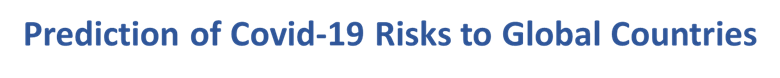
<font color=green>Student Name: Mohd Zamani Bin Abu Bakar</font> <br />
<font color=green>Student ID  : 17173342 / WQD190021</font> <br />



---

**STEP 1: IMPORT DATA** <br />
Main Datasets published by John Hopkins can be obtained here: <br />
1. **John Hopkins Coronavirus Resource Centre Data** <br /> https://github.com/Zamani-AB/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv <br />
2. **Human Development Index (HDI) Data** <br />http://hdr.undp.org/en/indicators/137506#

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/Zamani-AB/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48527,48718,48952,49161,49378,49621,49681,49817,50013,50190
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,48530,49191,50000,50637,51424,52004,52542,53003,53425,53814
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,92102,92597,93065,93507,93933,94371,94781,95203,95659,96069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7338,7382,7382,7446,7466,7519,7560,7577,7602,7633
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16188,16277,16362,16407,16484,16562,16626,16644,16686,16802


In [6]:
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20
count,270.000000,270.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02,2.710000e+02
mean,20.817839,23.439277,2.047970,2.413284,3.472325,5.291513,7.815498,10.800738,20.583026,22.756458,...,2.669211e+05,2.688535e+05,2.711630e+05,2.738729e+05,2.765873e+05,2.792355e+05,2.815094e+05,2.834815e+05,2.854784e+05,2.878651e+05
std,25.171460,72.529836,27.026899,27.125204,33.769345,46.999290,65.681295,88.495349,217.167147,218.495596,...,1.271360e+06,1.282236e+06,1.294010e+06,1.308666e+06,1.322848e+06,1.337369e+06,1.349265e+06,1.360225e+06,1.371170e+06,1.383156e+06
min,-51.796300,-172.104600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.424864,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.760000e+02,6.775000e+02,6.810000e+02,6.845000e+02,6.920000e+02,6.980000e+02,6.980000e+02,6.980000e+02,6.980000e+02,7.025000e+02
50%,22.041450,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.345000e+03,8.345000e+03,8.498000e+03,8.498000e+03,8.498000e+03,8.498000e+03,8.498000e+03,8.557000e+03,8.557000e+03,8.557000e+03
75%,41.143200,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.097480e+05,1.112315e+05,1.133250e+05,1.149320e+05,1.157200e+05,1.168970e+05,1.176815e+05,1.184865e+05,1.187690e+05,1.192920e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.633436e+07,1.652721e+07,1.672597e+07,1.697338e+07,1.720959e+07,1.745930e+07,1.765559e+07,1.784469e+07,1.803521e+07,1.823024e+07


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Columns: 340 entries, Province/State to 12/22/20
dtypes: float64(2), int64(336), object(2)
memory usage: 720.0+ KB


In [8]:
data_refined = pd.read_csv("https://raw.githubusercontent.com/Zamani-AB/COVID-19/master/Covid%2019%20Case_simplified.csv")
data_refined.head()

,Date,Number of Cases,Country/Region,Total Population (millions) 2015,"Physicians (per 10,000 people) 2001-2014",Public health expenditure (% of GDP) 2014
0,12/22/2020,50190,Afghanistan,32.5,2.7,2.9
1,12/22/2020,53814,Albania,2.9,11.5,2.9
2,12/22/2020,96069,Algeria,39.7,12.1,5.2
3,12/22/2020,7633,Andorra,0.1,40.0,6.3
4,12/22/2020,16802,Angola,25.0,1.7,2.1


In [9]:
data_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
Date                                         179 non-null object
Number of Cases                              179 non-null int64
Country/Region                               179 non-null object
Total Population (millions) 2015             179 non-null float64
Physicians  (per 10,000 people) 2001-2014    179 non-null float64
Public health expenditure (% of GDP) 2014    179 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.5+ KB


In [10]:
# Confirmation of all data populated (no null cells)
data_refined.isnull().sum()

Date                                         0
Number of Cases                              0
Country/Region                               0
Total Population (millions) 2015             0
Physicians  (per 10,000 people) 2001-2014    0
Public health expenditure (% of GDP) 2014    0
dtype: int64

**Clustering 1: K-Means Clustering for "Number of Cases" & "Total Population"**

In [27]:
# using only "Number of Cases" & Total Population" for easy visualisation
X = data_refined.iloc[:, [4, 5]].values
print(X)

[[ 2.7  2.9]
 [11.5  2.9]
 [12.1  5.2]
 [40.   6.3]
 [ 1.7  2.1]
 [ 0.   3.8]
 [38.6  2.7]
 [27.   1.9]
 [32.7  6.3]
 [48.3  8.7]
 [34.   1.2]
 [28.2  3.6]
 [ 9.2  3.2]
 [ 3.6  0.8]
 [18.1  4.7]
 [39.3  3.7]
 [48.9  8.2]
 [ 8.3  3.9]
 [ 0.6  2.3]
 [ 2.6  2.6]
 [ 4.7  4.6]
 [19.3  6.8]
 [ 3.4  3.2]
 [18.9  3.8]
 [14.4  2.5]
 [38.7  4.6]
 [ 0.5  2.6]
 [ 6.1  1. ]
 [ 0.3  4. ]
 [ 3.1  3.6]
 [ 1.7  1.3]
 [ 0.8  0.9]
 [20.7  7.4]
 [ 0.5  2.1]
 [ 0.4  2. ]
 [10.3  3.9]
 [19.4  3.1]
 [14.7  5.4]
 [ 1.5  2.2]
 [ 1.   4.2]
 [ 1.1  1.6]
 [11.1  6.8]
 [ 1.4  1.7]
 [30.   6.4]
 [67.2 10.6]
 [23.3  3.3]
 [36.2  6.3]
 [34.9  9.2]
 [ 2.3  6.8]
 [15.9  3.8]
 [14.9  2.9]
 [17.2  4.5]
 [28.3  2.2]
 [16.   4.5]
 [ 3.   2.9]
 [ 0.5  1.5]
 [32.4  5. ]
 [ 1.7  7. ]
 [ 0.2  2.9]
 [ 4.3  3. ]
 [29.1  7.3]
 [31.9  9. ]
 [ 2.9  2.4]
 [ 0.4  5. ]
 [42.7  1.6]
 [38.9  8.7]
 [ 1.   2.1]
 [61.7  5. ]
 [ 6.6  2.8]
 [ 9.3  2.3]
 [ 1.   2.7]
 [ 0.5  1.1]
 [ 2.1  3.1]
 [ 0.   1.6]
 [ 3.7  4.4]
 [30.8  4.9]
 [34.8  7.2]

In [28]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

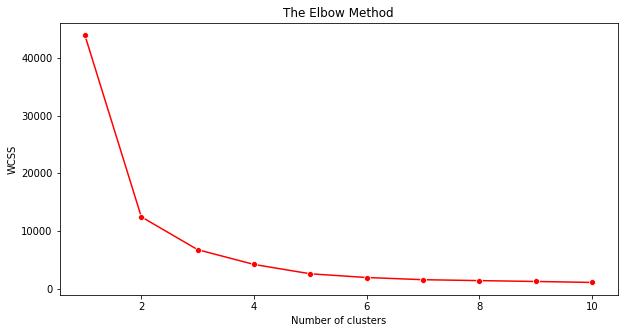

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 30)
y_kmeans = kmeans.fit_predict(X)

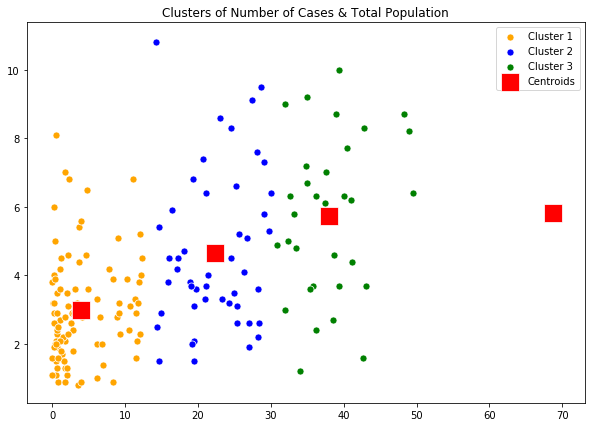

In [33]:
# Visualising the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'orange', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of Number of Cases & Total Population')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

---